<a href="https://colab.research.google.com/github/Roja20092002/Automatic_Recognition_of_Non-standard_Number_Plates_Using_YOLOv8/blob/main/YOLO_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = '/content/gdrive/MyDrive/YOLO_V8'

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

In [ ]:
%pip install ultralytics
import ultralytics
from ultralytics import YOLO
import os
ultralytics.checks()

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
%cd /content/gdrive/MyDrive/YOLO_V8

/content/gdrive/MyDrive/YOLO_V8


In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs  train  valid


## Model Training

In [ ]:
!yolo task=detect mode=train model=yolov8n.yaml data=data.yaml epochs=100 imgsz=224 plots=True


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
!pwd

/content/gdrive/MyDrive/YOLO_V8


In [ ]:
cd /content/gdrive/MyDrive/YOLO_V8

/content/gdrive/MyDrive/YOLO_V8


## Validate Data

In [ ]:
!yolo task=detect mode=val model=/content/gdrive/MyDrive/YOLO_V8/runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 25.5MB/s]
val: Scanning /content/gdrive/MyDrive/YOLO_V8/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:16<00:00,  3.26s/it]
                   all         75         75      0.974      0.933      0.956      0.612
Speed: 0.2ms preprocess, 13.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!pwd

/content


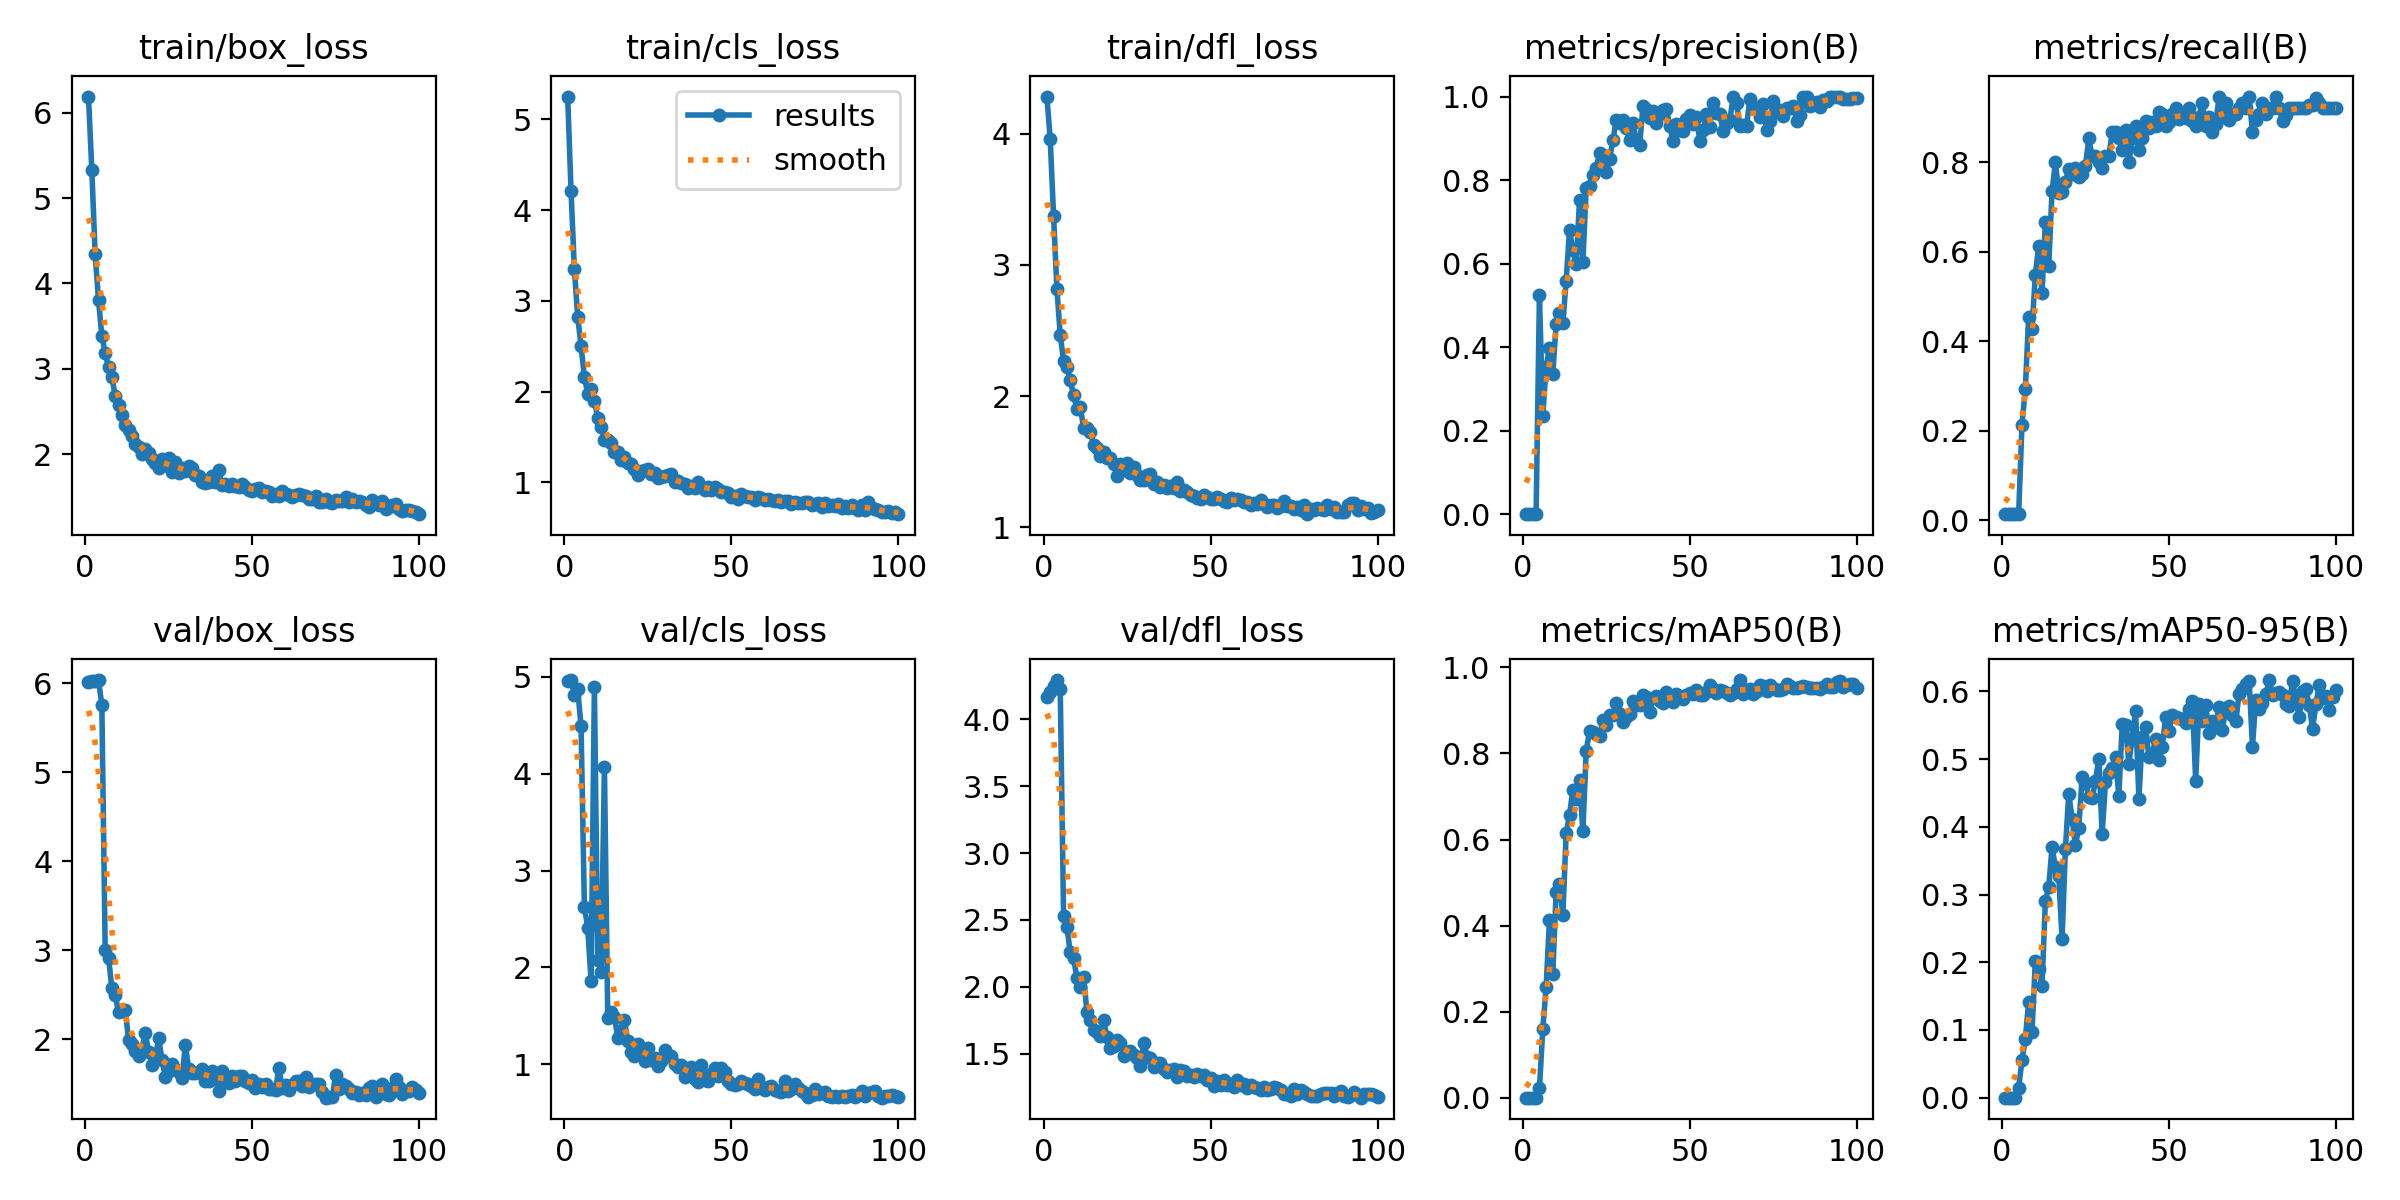

In [ ]:
path= "/content/gdrive/MyDrive/YOLO_V8/runs/detect/train2/results.png"
im2 = cv2.imread(path)
cv2_imshow(im2)

## Predictions

In [ ]:
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/YOLO_V8/runs/detect/train2/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/YOLO_V8/test

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/11 /content/gdrive/MyDrive/YOLO_V8/test/CG13.jpg: 224x192 1 License-Plate, 53.1ms
image 2/11 /content/gdrive/MyDrive/YOLO_V8/test/CG18.jpg: 224x192 1 License-Plate, 6.8ms
image 3/11 /content/gdrive/MyDrive/YOLO_V8/test/CG22.jpg: 224x224 2 License-Plates, 6.9ms
image 4/11 /content/gdrive/MyDrive/YOLO_V8/test/CH2.jpg: 192x224 1 License-Plate, 50.7ms
image 5/11 /content/gdrive/MyDrive/YOLO_V8/test/GA8.jpg: 128x224 1 License-Plate, 49.3ms
image 6/11 /content/gdrive/MyDrive/YOLO_V8/test/GJ2.jpg: 224x128 1 License-Plate, 96.0ms
image 7/11 /content/gdrive/MyDrive/YOLO_V8/test/HR10.jpg: 224x224 1 License-Plate, 7.6ms
image 8/11 /content/gdrive/MyDrive/YOLO_V8/test/JH10.jpg: 224x128 1 License-Plate, 7.3ms
image 9/11 /content/gdrive/MyDrive/YOLO_V8/test/JK32.jpg: 192x224 1 License-Plate, 7.6ms
image 10/11 /content/gdrive

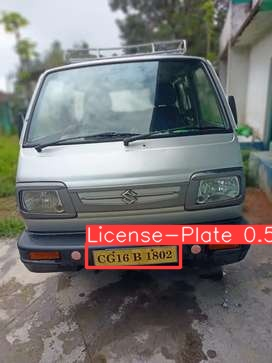

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob("/content/gdrive/MyDrive/YOLO_V8/runs/detect/predict2/*.jpg")[:1]:
        display(Image(filename=image_path, width=300))
        print("\n")





> Save cropped license plate image



In [ ]:
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/YOLO_V8/runs/detect/train2/weights/best.pt conf=0.25 source=/content/CH2.jpg save=True save_crop=True

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/CH2.jpg: 192x224 1 License-Plate, 82.0ms
Speed: 1.0ms preprocess, 82.0ms inference, 89.6ms postprocess per image at shape (1, 3, 192, 224)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


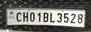

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob("/content/gdrive/MyDrive/YOLO_V8/runs/detect/predict4/crops/License-Plate/*.jpg"):
        display(Image(filename=image_path, width=300))
        print("\n")

In [ ]:
image_path

'/content/gdrive/MyDrive/YOLO_V8/runs/detect/predict4/crops/License-Plate/CH2.jpg'

## Text Recognition

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.8 MB/s eta 0:00:00


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

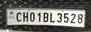

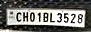

True

In [ ]:
# Load the image
img = cv2.imread(image_path)

# Apply a sharpening filter (e.g., a kernel)
blurred = cv2.GaussianBlur(img, (0, 0), 3)
unsharp_mask = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

# Display the original and sharpened images
cv2_imshow(img)
cv2_imshow(unsharp_mask)

output_path = "/content/unsharp_mask.jpg"  # Replace with your desired output path
cv2.imwrite(output_path, unsharp_mask)

In [ ]:
IMAGE_PATH = "/content/unsharp_mask.jpg"

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
result = reader.readtext(IMAGE_PATH)
result

[([[15, 11], [87, 11], [87, 27], [15, 27]],
  'CHO IBL 3528',
  0.3947370178810742)]

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),1)
img = cv2.putText(img,text,top_left, font, 0.33,(255,255,255),1,cv2.LINE_AA)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

NameError: ignored

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python
!sudo apt-get install tesseract-ocr-*

In [ ]:
import pytesseract
import shutil
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image

In [ ]:
image = Image.open(IMAGE_PATH)
extractedText = pytesseract.image_to_string(image)
print("Recognized Text:")
print(extractedText)

Recognized Text:
 



In [ ]:
extractedText
#print(pytesseract.image_to_boxes(Image.open(image_path)))
#print(pytesseract.image_to_data(Image.open(image_path)))

' \n\x0c'